In [5]:
import numpy as np

class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.output = None

    def activate(self, x):
        return 1/(1+np.exp(-x))

    def forward(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        self.output = self.activate(weighted_sum)
        return self.output

num_inputs = 3
neuron = Neuron(num_inputs)

input_values = np.random.rand(num_inputs)

output_value = neuron.forward(input_values)

print("Input Values:", input_values)
print("Weights:", neuron.weights)
print("Bias:", neuron.bias)
print("Output:", output_value)


Input Values: [0.71207837 0.77195284 0.54090764]
Weights: [0.70356116 0.82832276 0.17866741]
Bias: 0.7430972322918474
Output: 0.8786978550336664


Epoch 0/100, Accuracy: 50.00%
Epoch 10/100, Accuracy: 100.00%
Epoch 20/100, Accuracy: 100.00%
Epoch 30/100, Accuracy: 100.00%
Epoch 40/100, Accuracy: 100.00%
Epoch 50/100, Accuracy: 100.00%
Epoch 60/100, Accuracy: 100.00%
Epoch 70/100, Accuracy: 100.00%
Epoch 80/100, Accuracy: 100.00%
Epoch 90/100, Accuracy: 100.00%


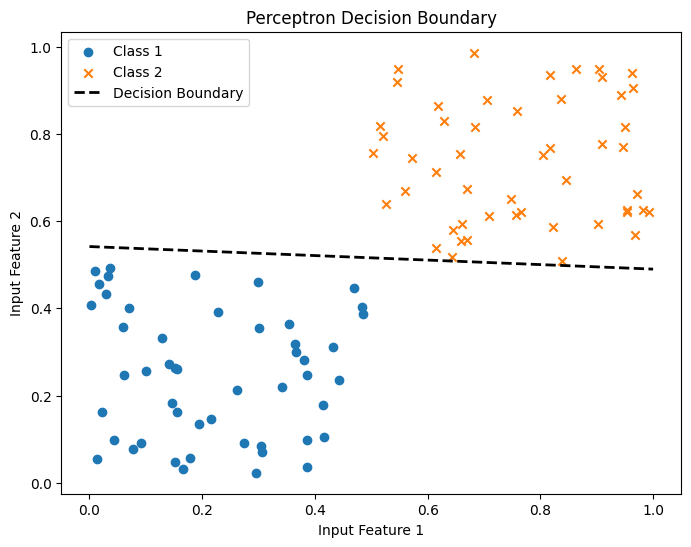

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        activation = np.dot(inputs, self.weights) + self.bias
        return 1 if activation >= 0 else -1

    def train(self, training_data, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)

                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)

            if epoch % 10 == 0:
                accuracy = self.evaluate(training_data, labels)
                print(f"Epoch {epoch}/{self.epochs}, Accuracy: {accuracy:.2%}")

    def evaluate(self, inputs, labels):
        predictions = np.array([self.predict(x) for x in inputs])
        accuracy = np.mean(predictions == labels)
        return accuracy

    def decision_boundary(self, x):
        return -(self.weights[0] * x + self.bias) / self.weights[1]

input_size = 2 
perceptron = Perceptron(input_size)

np.random.seed(42)
class_1 = np.random.rand(50, input_size) * 0.5
class_2 = np.random.rand(50, input_size) * 0.5 + 0.5
training_data = np.concatenate((class_1, class_2), axis=0)
labels = np.concatenate((np.ones(50), -np.ones(50)))

perceptron.train(training_data, labels)

plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', marker='x')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')

x_boundary = np.linspace(0, 1, 100)
y_boundary = perceptron.decision_boundary(x_boundary)
plt.plot(x_boundary, y_boundary, color='black', linestyle='dashed', linewidth=2, label='Decision Boundary')

plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

In [11]:
import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.01, epochs=100):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activate(weighted_sum)

    def train(self, training_data, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                error = label - prediction

                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def evaluate(self, test_data, labels):
        correct_predictions = 0
        total_samples = len(test_data)

        for inputs, label in zip(test_data, labels):
            prediction = self.predict(inputs)
            if prediction == label:
                correct_predictions += 1

        accuracy = correct_predictions / total_samples
        return accuracy

if __name__ == "__main__":
    training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([0, 1, 1, 1])

    perceptron = Perceptron(num_inputs=2, learning_rate=0.1, epochs=1000)

    perceptron.train(training_data, labels)

    accuracy = perceptron.evaluate(training_data, labels)
   
    print("Trained Weights:", perceptron.weights)
    print("Trained Bias:", perceptron.bias)
    print("Accuracy:", accuracy)

Trained Weights: [0.64203165 0.08413996]
Trained Bias: -0.03837128590538624
Accuracy: 1.0


In [12]:
import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.01, epochs=100):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias

        return self.activate(weighted_sum)

    def train(self, training_data, labels):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(training_data)):
                inputs = training_data[i]
                target = labels[i]
                prediction = self.predict(inputs)

                error = target - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

                total_error += abs(error)

            print(f"Epoch {epoch + 1}/{self.epochs}, Total Error: {total_error}")

            if total_error == 0:
                print("Converged. Stopping training.")
                break

num_inputs = 2 
perceptron = Perceptron(num_inputs, learning_rate=0.01, epochs=100)

training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

perceptron.train(training_data, labels)

test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = [perceptron.predict(test_input) for test_input in test_data]

print("Test Predictions:", predictions)


Epoch 1/100, Total Error: 3
Epoch 2/100, Total Error: 2
Epoch 3/100, Total Error: 2
Epoch 4/100, Total Error: 2
Epoch 5/100, Total Error: 2
Epoch 6/100, Total Error: 2
Epoch 7/100, Total Error: 2
Epoch 8/100, Total Error: 2
Epoch 9/100, Total Error: 2
Epoch 10/100, Total Error: 2
Epoch 11/100, Total Error: 2
Epoch 12/100, Total Error: 2
Epoch 13/100, Total Error: 2
Epoch 14/100, Total Error: 2
Epoch 15/100, Total Error: 2
Epoch 16/100, Total Error: 2
Epoch 17/100, Total Error: 2
Epoch 18/100, Total Error: 2
Epoch 19/100, Total Error: 2
Epoch 20/100, Total Error: 2
Epoch 21/100, Total Error: 2
Epoch 22/100, Total Error: 1
Epoch 23/100, Total Error: 1
Epoch 24/100, Total Error: 1
Epoch 25/100, Total Error: 1
Epoch 26/100, Total Error: 1
Epoch 27/100, Total Error: 1
Epoch 28/100, Total Error: 1
Epoch 29/100, Total Error: 1
Epoch 30/100, Total Error: 1
Epoch 31/100, Total Error: 1
Epoch 32/100, Total Error: 1
Epoch 33/100, Total Error: 1
Epoch 34/100, Total Error: 1
Epoch 35/100, Total Err

Sigmoid Activation:
[[0.9612559 ]
 [0.9484836 ]
 [0.95540261]
 [0.95727178]
 [0.95338108]
 [0.94880691]
 [0.95358503]
 [0.94557087]
 [0.95572752]
 [0.95228641]
 [0.94757337]
 [0.96686064]
 [0.94967815]
 [0.94985882]
 [0.95171169]
 [0.95604997]
 [0.95727364]
 [0.96581827]
 [0.95800603]
 [0.94147955]
 [0.95499728]
 [0.95151449]
 [0.9495659 ]
 [0.96188556]
 [0.95515639]
 [0.95784975]
 [0.95287003]
 [0.95040791]
 [0.95358339]
 [0.96147975]
 [0.95605767]
 [0.95971142]
 [0.94971331]
 [0.94443078]
 [0.95758598]
 [0.95409602]
 [0.94217651]
 [0.95929032]
 [0.9636075 ]
 [0.95682141]
 [0.96212052]
 [0.94480853]
 [0.9592475 ]
 [0.95194861]
 [0.95326902]
 [0.95592301]
 [0.96290289]
 [0.94995307]
 [0.94737661]
 [0.94679117]
 [0.95440996]
 [0.95881371]
 [0.95862876]
 [0.95856944]
 [0.95384496]
 [0.95495447]
 [0.9525414 ]
 [0.94487799]
 [0.95580392]
 [0.95590018]
 [0.95324569]
 [0.95929257]
 [0.96066859]
 [0.9511861 ]
 [0.96078573]
 [0.96014331]
 [0.96412992]
 [0.94972886]
 [0.94526947]
 [0.94713432]


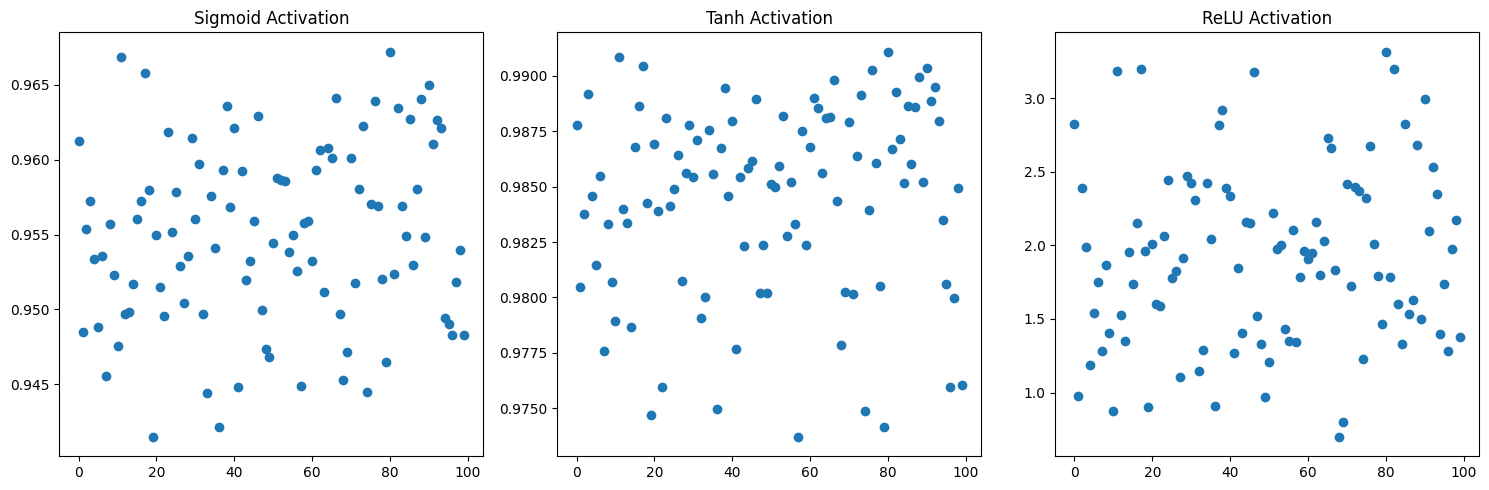

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_func):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_input_hidden = np.random.rand(hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden_output = np.random.rand(output_size)
        self.activation_func = activation_func

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, inputs):
        hidden_activations = self.activation_func(np.dot(inputs, self.weights_input_hidden) + self.bias_input_hidden)
        output_activations = self.activation_func(np.dot(hidden_activations, self.weights_hidden_output) + self.bias_hidden_output)
        return output_activations

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

input_size = 3
hidden_size = 5
output_size = 1
data_size = 100

np.random.seed(42)
inputs = np.random.rand(data_size, input_size)

sigmoid_nn = NeuralNetwork(input_size, hidden_size, output_size, activation_func=sigmoid)
tanh_nn = NeuralNetwork(input_size, hidden_size, output_size, activation_func=tanh)
relu_nn = NeuralNetwork(input_size, hidden_size, output_size, activation_func=relu)

print("Sigmoid Activation:")
sigmoid_output = sigmoid_nn.forward(inputs)
print(sigmoid_output)

print("\nTanh Activation:")
tanh_output = tanh_nn.forward(inputs)
print(tanh_output)

print("\nReLU Activation:")
relu_output = relu_nn.forward(inputs)
print(relu_output)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(range(data_size), sigmoid_output, marker='o')
plt.title('Sigmoid Activation')

plt.subplot(1, 3, 2)
plt.scatter(range(data_size), tanh_output, marker='o')
plt.title('Tanh Activation')

plt.subplot(1, 3, 3)
plt.scatter(range(data_size), relu_output, marker='o')
plt.title('ReLU Activation')

plt.tight_layout()
plt.show()